# DESCRIPTION:

In this Jupyter Notebook, unsupervised learning is carried out with a non-hierarchical clustering of the dataset of a wine sample with the K-means method.

<img src='images/wines.jpg' height="50" width="800">

[**Image source**](https://lacanasteria.com/wp-content/uploads/2021/08/temperatura-adobe-t.jpg)

# Non-hierarchical Clustering with the K-means Method of Wines.

## 1. Import libraries

**If there's the following warning:**

UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(

In [1]:
# Use the following line of code.
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Another option (Not recommended): 
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# View the Python version.
#!python --version   #Python 3.10.11

In [3]:
# Install packages:
#!conda install matplotlib
#!conda install scikit-learn
#!conda install seaborn
#import sklearn as sk or sl

In [4]:
import pandas as pd   #Data analysis
import numpy as np   #Scientific calcutions
import matplotlib.pyplot as plt   #Graph
import seaborn as sns   #Graph

In [5]:
# Non-hierarchical clustering (k-means)
from sklearn.cluster import KMeans

In [6]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

In [7]:
# To scale variables
from sklearn.preprocessing import StandardScaler   #To scale to a Normal Distribution
from sklearn.preprocessing import MinMaxScaler   #To scale from 0 to 1

In [8]:
# Pandas version
pd.__version__   #'1.5.3'

'1.5.3'

In [9]:
# Python dependencies with scikit-learn:
#sklearn.show_versions()

## 2. Fundamentals of the K-means method:

* It's unsupervised learning that will help us label wines according to their features, since they don't have any classification.
* The method works with discrete and continuous data, the dataset complies with them.
* Method has the capacity to analyze databases with more than 10,000 items.
* Its disadvantage is that it is necessary to know in advance the number of clusters into which we want to divide the elements contained in the database.
* To find out the optimal number of clusters, the elbow method is used.

## 3. Dataset

The dataset contains data for 178 wines and 13 columns that are basically:
* **Chemical properties**: Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Proline; and 
* **Organoleptic properties**: Color, Hue, Dilution.

In [10]:
df_wine = pd.read_csv('data/wine_characteristics.csv')
df_wine

,Wine,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 4. Exploratory analysis of the DataFrame

In [11]:
df_wine.info()

# All columns are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wine             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [12]:
# Delete the first column
df_wine.drop("Wine", axis=1, inplace=True)

In [13]:
# Select only discrete and continuous variables.
df_wine.select_dtypes(exclude='O')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
# Main statistics of the dataset.
df_wine.describe().round(2)

# We observe that the data of all the columns is very different with respect to the column "Proline"
#  So we will scale the columns between 0 and 1.

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


## 5. K-means Clustering

### 5.1 Scale data

**Scale a value (Min-Max method):**

$${\rm Scale}_{x_{i}}\ =\ \frac{x_{i}\ -\ MIN}{MAX\ -\ MIN}\ = \frac{x_{i}\ -\ MIN}{RANGO}$$

In [15]:
# Scale column values (with sklearn libray)
scaler_model = MinMaxScaler()
scaler_model.fit_transform(df_wine)

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [16]:
# Scale column values (Manual way)
df_norm = (df_wine - df_wine.min())/(df_wine.max() - df_wine.min())
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


### 5.2 ¿What's the optimal number of clusters (K)?
For this, we will use a method called "Jambu Elbow"

In [17]:
# One measurement is "Within Cluster Sum of Squares"
WCSS = []   #Intraclass inertia

for i in range(1,11):
    # K-means model default values
    #n_clusters=8, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0,
    #random_state=None, copy_x=True, algorithm='lloyd'
    kmeans_model = KMeans(n_clusters=i, n_init='auto', random_state=123)   
    kmeans_model.fit(df_norm)

    WCSS.append(kmeans_model.inertia_)   # Add inertia
                                        # How far apart the data is from its centroids.
    
WCSS

[95.59953778471063,
 64.5376670238943,
 48.98541496004466,
 44.881590897400365,
 43.0171809367102,
 41.52664522152519,
 39.959980431096405,
 37.03478233350775,
 36.10131380546611,
 33.733598105345784]

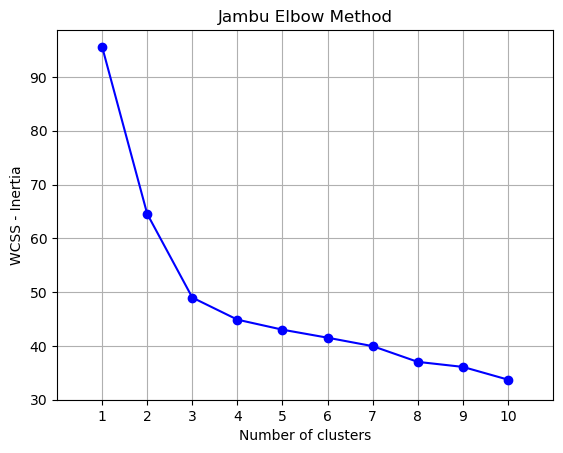

In [18]:
plt.plot(range(1,11), WCSS, 'bo-')

plt.title("Jambu Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS - Inertia")   # Indicator of how similar the individuals are within the cluster.
plt.xlim(0,11)
plt.xticks(np.arange(1, 11, step=1))
plt.ylim(30,)
plt.grid(axis='both')

plt.show()

# I choose "3"(Number of clusters), because at that point the curve stops vertiginous decreasing.
#  It indicates the optimal number of clusters to form.

### 5.3 Principal component analysis (Reduce dimensionality)

In [19]:
# K-means model default values:
#  n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, 
#  iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto',
#  random_state=None

In [20]:
# PCA Model with maximum of components.
pca_model = PCA(random_state=123)


In [21]:
# Adjust standardized data
components = pca_model.fit_transform(df_norm)
components


array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [22]:
# Variances(Eigenvalues)
variances = pca_model.explained_variance_ratio_
variances

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

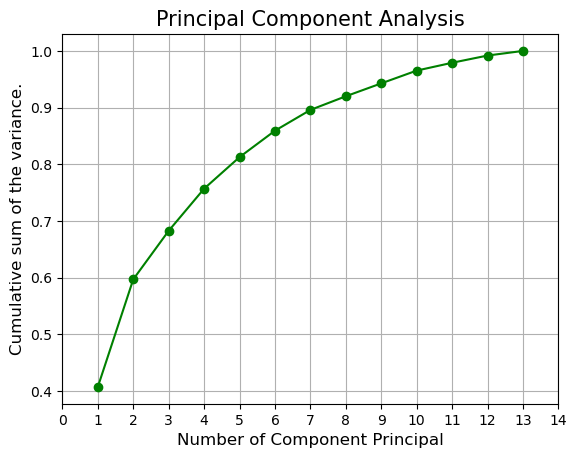

In [23]:
plt.plot(np.arange(1,14),
         np.cumsum(variances),
         'go-'
        )

plt.title('Principal Component Analysis', size=15)
plt.xlabel('Number of Component Principal', size=12)
plt.ylabel('Cumulative sum of the variance.', size=12)
plt.xlim(0,14)
plt.xticks(np.arange(0,15,1))
plt.grid()

plt.show()

# With 7 components we get about 90% of all variance.

In [24]:
# Sum of the variances of the 7 principal components
variances[:7].sum()

0.8959625195457817

### 5.4 Clustering (K=3) from the 7 components.

In [25]:
# Create the model to 3 clusters
clustering_model = KMeans(n_clusters=3, n_init="auto", random_state=123)


In [26]:
components[:,:7]

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02, ...,
        -2.65795809e-02, -7.43644860e-02,  6.51717951e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01, ...,
        -2.38634447e-01, -7.18773018e-02,  6.85560138e-04],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01, ...,
         4.50448819e-02,  8.71163881e-02,  1.25605249e-01],
       ...,
       [ 6.26312888e-01, -5.46857013e-01, -3.04947552e-02, ...,
         7.37382032e-02,  3.17027708e-02,  1.86333922e-01],
       [ 5.72991102e-01, -4.25516087e-01, -9.45367174e-02, ...,
         1.50559179e-01,  1.12254009e-01,  1.48922360e-01],
       [ 7.01763997e-01, -5.13504983e-01,  2.93909961e-01, ...,
        -2.51381748e-02,  9.06167004e-02, -1.13451595e-01]])

In [27]:
# Apply the clustering model to the data
clustering_model.fit_transform(components[:,:7])


array([[0.92005999, 1.2948113 , 0.23333942],
       [0.7147644 , 1.14431627, 0.41527533],
       [0.7683105 , 1.13460812, 0.28087776],
       [1.23181139, 1.46254982, 0.52934803],
       [0.57633878, 0.88134236, 0.47911711],
       [1.05795854, 1.24566567, 0.36225452],
       [0.89661396, 1.1684305 , 0.27334081],
       [0.89280376, 1.12719693, 0.3260302 ],
       [0.88933295, 1.13281424, 0.3353934 ],
       [0.85730321, 1.22976097, 0.30869578],
       [1.01470659, 1.32712494, 0.29587416],
       [0.79438536, 1.01872522, 0.34888755],
       [0.78087374, 1.0575222 , 0.22097762],
       [1.07937823, 1.33220759, 0.56150267],
       [1.26077476, 1.50166325, 0.59896848],
       [0.88871107, 1.09929691, 0.27168564],
       [0.9488308 , 1.07468813, 0.34492344],
       [0.83058666, 1.00911339, 0.34778603],
       [1.22378683, 1.39253235, 0.52485696],
       [0.76960862, 1.103063  , 0.37174735],
       [0.80009329, 1.24752691, 0.23511346],
       [0.58463344, 0.98023295, 0.53011316],
       [0.

In [28]:
clustering_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
# Add the clustering column to the first DataFrame.
df_wine['KMeans_clusters'] = clustering_model.labels_
df_wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [30]:
# Centroids of the first and second component.
clustering_model.cluster_centers_[:,:2]

array([[-0.03711634,  0.36373888],
       [ 0.5802463 , -0.19027545],
       [-0.49292029, -0.20750666]])

In [31]:
# Number of wines classified for each cluster.
df_wine.KMeans_clusters.value_counts().sort_index()   #55, 62, 61

0    63
1    55
2    60
Name: KMeans_clusters, dtype: int64

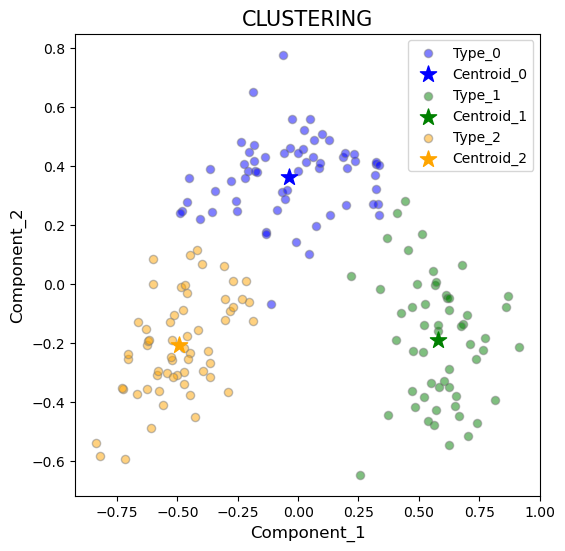

In [32]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component_1', fontsize=12)
ax.set_ylabel('Component_2', fontsize=12)
ax.set_title('CLUSTERING', fontsize=15)

color_theme = ['blue', 'green', 'orange']   # Label colors

for i in range(3):
    # Graph data
    ax.scatter(x=components[:,0][df_wine.KMeans_clusters==i],
               y=components[:,1][df_wine.KMeans_clusters==i], 
               c=color_theme[i], 
               edgecolors='gray', 
               s=35,
               label = f'Type_{i}',
               alpha=0.5
              )
    
    #Graph clustering centroids
    ax.scatter(x=clustering_model.cluster_centers_[:,0][i],
               y=clustering_model.cluster_centers_[:,1][i], 
               c=color_theme[i], 
               marker='*',
               s=150,
               label = f'Centroid_{i}',
              )
    
plt.legend()

plt.show()

## 6. Conclusions:

In [33]:
df_wine.groupby('KMeans_clusters').mean().round(2)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
KMeans_clusters,,,,,,,,,,,,,
0,12.23,1.97,2.25,20.25,92.95,2.30,2.16,0.35,1.67,3.03,1.06,2.88,500.17
1,13.10,3.16,2.41,21.04,98.65,1.69,0.85,0.46,1.13,6.94,0.72,1.71,624.85
2,13.72,1.96,2.46,17.28,107.87,2.85,2.97,0.29,1.93,5.46,1.07,3.16,1117.82


In [34]:
# Save DataFrame with the clusters assigned to each wine on a file .csv 
df_wine.to_csv('data/clustered_wine.csv', index=False)